# Proyek Predictive Analytics: Water Quality
- **Nama:** Ahmad Sabil Deva Pratama
- **Email:** devapratama4912@gmail.com
- **ID Dicoding:** devaprtm49

## 1. Domain Proyek

### **Latar Belakang**  

Kualitas air minum merupakan salah satu indikator utama kesehatan masyarakat dan keberlanjutan ekosistem. Menurut laporan **World Health Organization (WHO)**, lebih dari 2 miliar orang di dunia kekurangan akses terhadap air minum yang aman, yang dapat meningkatkan risiko penyakit seperti diare, kolera, dan keracunan kimia. Di Indonesia, data dari **Badan Pusat Statistik (BPS)** tahun 2023 menunjukkan bahwa sekitar 8% rumah tangga di Indonesia belum memiliki akses terhadap sumber air minum yang layak karena kualitas air sering kali tidak memenuhi standar kesehatan.  

Masalah ini semakin mendesak dengan meningkatnya urbanisasi, pencemaran lingkungan, dan perubahan iklim, yang memperburuk kualitas sumber air. Pemantauan kualitas air secara manual sering kali memakan waktu dan biaya yang signifikan. Oleh karena itu, diperlukan pendekatan otomatis yang cepat, efisien, dan akurat untuk menentukan apakah air dapat dikategorikan layak konsumsi.  

**Referensi:**  
- World Health Organization. *Drinking-water*. [WHO Report](https://www.who.int/news-room/fact-sheets/detail/drinking-water)  
- Badan Pusat Statistik. *Akses Rumah Tangga terhadap Air Minum*. BPS 2023. [BPS 2023](https://www.bps.go.id/id/statistics-table/2/ODU0IzI=/persentase-rumah-tangga-menurut-provinsi-tipe-daerah-dan-sumber-air-minum-layak.html)

## 2. Business Understanding

#### **Problem Statements**  

1. **Bagaimana memanfaatkan data parameter fisik dan kimia air untuk memprediksi kelayakan air minum?**  
2. **Apa saja parameter yang paling berkontribusi dalam menentukan kualitas air minum?**  

#### **Goals**  

1. **Membangun model prediktif** yang mampu mengklasifikasikan kelayakan air minum berdasarkan parameter fisik dan kimia.  
   - Model akan memberikan hasil klasifikasi: *layak konsumsi* atau *tidak layak konsumsi*.  
2. **Mengidentifikasi fitur utama** yang mempengaruhi keputusan kelayakan air minum untuk memberikan rekomendasi perbaikan kualitas.  

#### **Solution Statement**  

Untuk mencapai tujuan tersebut, beberapa langkah akan dilakukan:  

1. **Pemanfaatan dataset kualitas air** yang mencakup parameter seperti pH, kandungan kimia, dan karbon organik untuk melatih model machine learning.  
2. **Eksperimen algoritma machine learning**:  
   - **Baseline Model:** Random Forest dan SVM untuk evaluasi awal.  
   - **Model Improvement:** Gradient Boosting untuk menangkap pola yang lebih kompleks.  
3. **Evaluasi model** menggunakan metrik seperti akurasi, precision, recall, dan F1-score.  
4. **Hyperparameter Tuning**: Dilakukan pada model dengan performa terbaik untuk meningkatkan akurasi prediksi.  

Dengan solusi ini, diharapkan proses pemantauan kualitas air menjadi lebih efisien, serta semakin praktis untuk pengelolaan sumber daya air yang lebih baik.  

## 2. Data Understanding

### **Pendahuluan**  
Dataset yang digunakan dalam proyek ini berasal dari **Kaggle**, dengan judul *Water Potability Dataset* (https://www.kaggle.com/datasets/adityakadiwal/water-potability). Dataset ini mencakup 3.276 data poin yang merepresentasikan kualitas air dari berbagai sumber berdasarkan parameter fisik dan kimia, serta label apakah air tersebut layak dikonsumsi (potable) atau tidak (non-potable). Dataset ini sangat relevan untuk analisis karena mencerminkan kondisi nyata kualitas air dan parameter penting yang menentukan kelayakan air minum.  

### **Deskripsi Variabel**  
Dataset memiliki 10 kolom (fitur) dengan penjelasan sebagai berikut:  

1. **`ph`**: pH air (skala 0–14), mengukur keseimbangan asam-basa.  
2. **`Hardness`**: Kekerasan air, menunjukkan kemampuan air untuk mengendapkan sabun (dalam mg/L).  
3. **`Solids`**: Jumlah total padatan terlarut dalam air (dalam ppm).  
4. **`Chloramines`**: Jumlah kloramin dalam air, digunakan untuk desinfeksi (dalam ppm).  
5. **`Sulfate`**: Jumlah sulfat terlarut dalam air (dalam mg/L).  
6. **`Conductivity`**: Konduktivitas listrik air, menunjukkan jumlah ion terlarut (dalam μS/cm).  
7. **`Organic_carbon`**: Jumlah karbon organik terlarut (dalam ppm).  
8. **`Trihalomethanes`**: Jumlah trihalometana, produk sampingan disinfeksi air (dalam μg/L).  
9. **`Turbidity`**: Tingkat kekeruhan air (dalam NTU).  
10. **`Potability`**: Label biner yang menunjukkan apakah air dapat diminum:  
   - `1`: Layak konsumsi  
   - `0`: Tidak layak konsumsi  

### **Exploratory Data Analysis (EDA)**  

EDA bertujuan untuk memahami pola data, distribusi nilai, hubungan antar variabel, serta anomali yang ada.

In [53]:
# Import Semua Packages/Library yang Digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

#### **1. Memuat Dataset**

Langkah pertama adalah memuat dataset yang berisi data kualitas air. Dataset ini mencakup berbagai fitur fisik dan kimia air, serta target `Potability` yang menunjukkan apakah air tersebut layak konsumsi (`1`) atau tidak (`0`).


In [54]:
# Memuat dataset
data = pd.read_csv('water_potability.csv')

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Dataset ini berisi 3276 baris dan 10 kolom. Kolom terakhir adalah `Potability` yang menunjukkan apakah air layak untuk dikonsumsi atau tidak. Dataset ini memungkinkan kita untuk mengembangkan model klasifikasi yang memprediksi apakah air tersebut layak atau tidak berdasarkan berbagai parameter kualitas air.


#### **2. Analisis Missing Values**  
Sebelum melanjutkan analisis, kita perlu mengecek apakah terdapat nilai yang hilang (missing values) pada dataset. Missing values dapat memengaruhi hasil analisis dan prediksi model, sehingga perlu ditangani.

In [55]:
# Mengecek jumlah missing values per kolom
missing = data.isnull().sum()
missing_percentage = (missing / len(data)) * 100
missing_df = pd.DataFrame({'Jumlah Missing': missing, 'Persentase': missing_percentage})

print("Informasi Missing Values:")
display(missing_df)

Informasi Missing Values:


,Jumlah Missing,Persentase
ph,491,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,4.945055
Turbidity,0,0.000000
Potability,0,0.000000


Beberapa kolom seperti `ph`, `Sulfate`, dan `Trihalomethanes` memiliki missing values. Kolom `Sulfate` memiliki persentase missing yang cukup tinggi (23.84%). Selanjutnya missing values tersebut perlu untuk ditangani.


#### **3. Analisis Distribusi Fitur Numerik**  

Distribusi setiap fitur numerik divisualisasikan untuk memahami pola data.

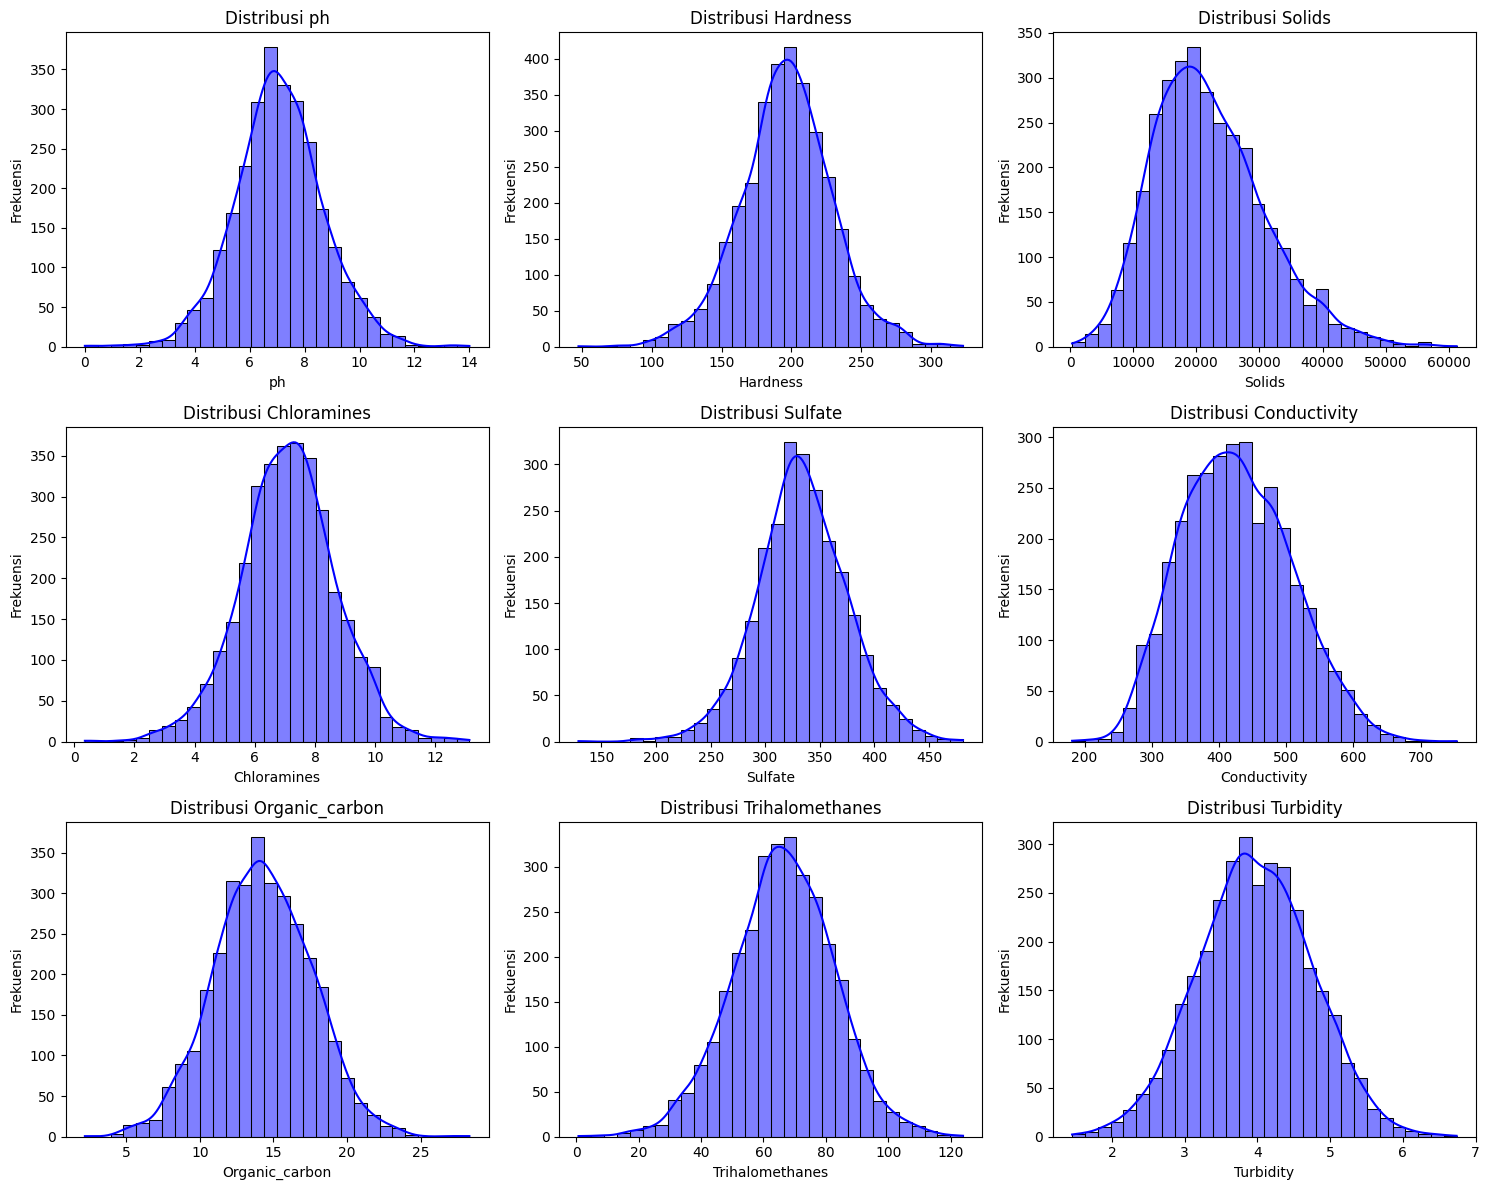

In [56]:
# Visualisasi histogram untuk semua fitur numerik
numerical_cols = data.drop(columns=['Potability']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()

1. **`Solids`**: Terlihat skewed ke kanan, dengan beberapa nilai ekstrem sangat tinggi (kemungkinan outlier).  
2. **`Trihalomethanes`**: Distribusi terlihat sedikit cenderung skewed ke kiri.  

Selain itu semuanya cenderung terlihat memiliki distribusi normal. Selanjutnya fitur yang memiliki distribusi skewed perlu untuk ditangani.


#### **4. Analisis Distribusi Kategori `Potability`**  

Distribusi data untuk kelas `Potability` (1: layak konsumsi, 0: tidak layak) diperiksa.



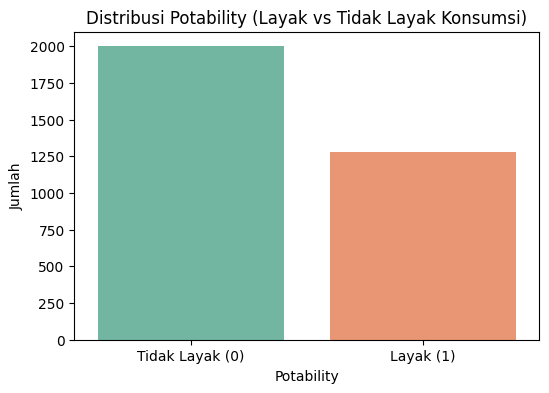

Persentase distribusi Potability:
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


In [57]:
# Visualisasi distribusi Potability
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=data, palette='Set2')
plt.title("Distribusi Potability (Layak vs Tidak Layak Konsumsi)")
plt.xlabel("Potability")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ['Tidak Layak (0)', 'Layak (1)'])
plt.show()

# Proporsi kelas
potability_counts = data['Potability'].value_counts(normalize=True) * 100
print("Persentase distribusi Potability:")
print(potability_counts)

Proporsi data `Potability` tidak seimbang dengan sekitar 2000 tidak layak dan 1250 layak (61% tidak layak, 39% layak). Ketidakseimbangan ini perlu diperhatikan dalam pemodelan, misalnya dengan *oversampling* atau teknik lainnya.  

#### **5. Outlier Detection dengan Boxplot**  

Boxplot digunakan untuk mendeteksi anomali pada fitur numerik.


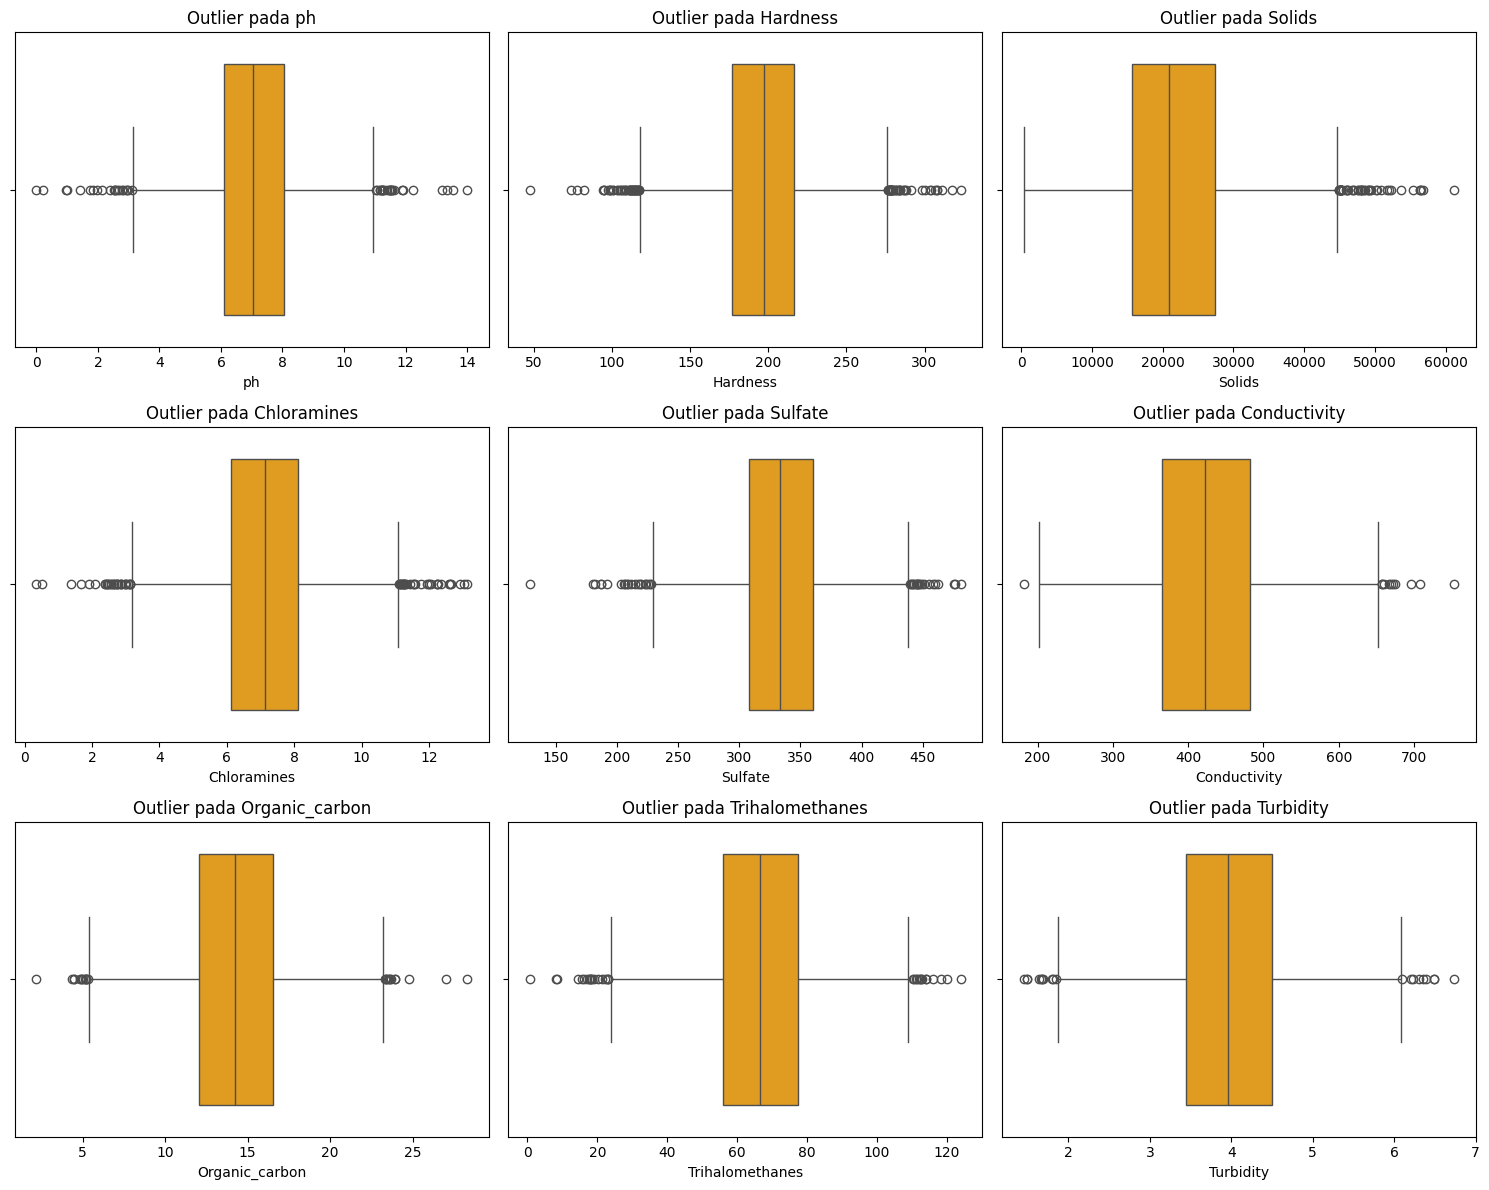

In [58]:
# Boxplot untuk semua fitur numerik
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Outlier pada {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**`Solids`** memiliki banyak outlier ekstrem. Outlier dapat memengaruhi analisis dan perlu dievaluasi apakah perlu dihapus atau tidak.

#### **6. Hubungan Antar Fitur dengan Korelasi**  

Korelasi antara fitur numerik dapat memberikan insight tentang hubungan antar variabel.


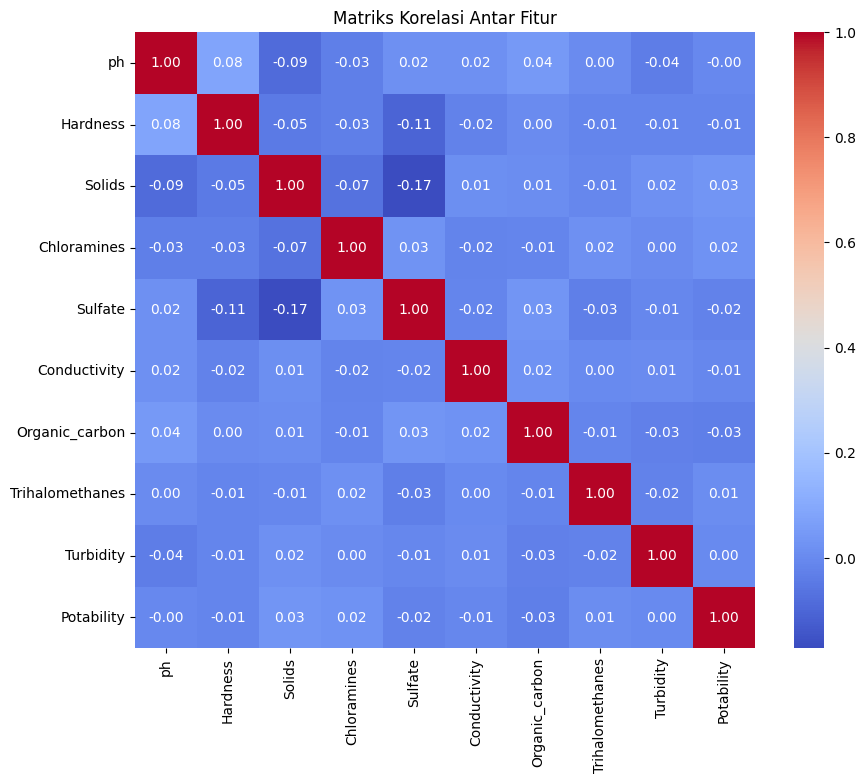

In [59]:
# Matriks korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

**`Solids`** memiliki korelasi negatif sedikit kuat dengan **`sulfate`** (0.17), menunjukkan hubungan antara kedua fitur tersebut. Selain itu tidak ada korelasi kuat antara variabel numerik lainnya.  



#### **6. Analisis Fitur terhadap `Potability`**  

Hubungan fitur numerik dengan label `Potability` divisualisasikan menggunakan boxplot.

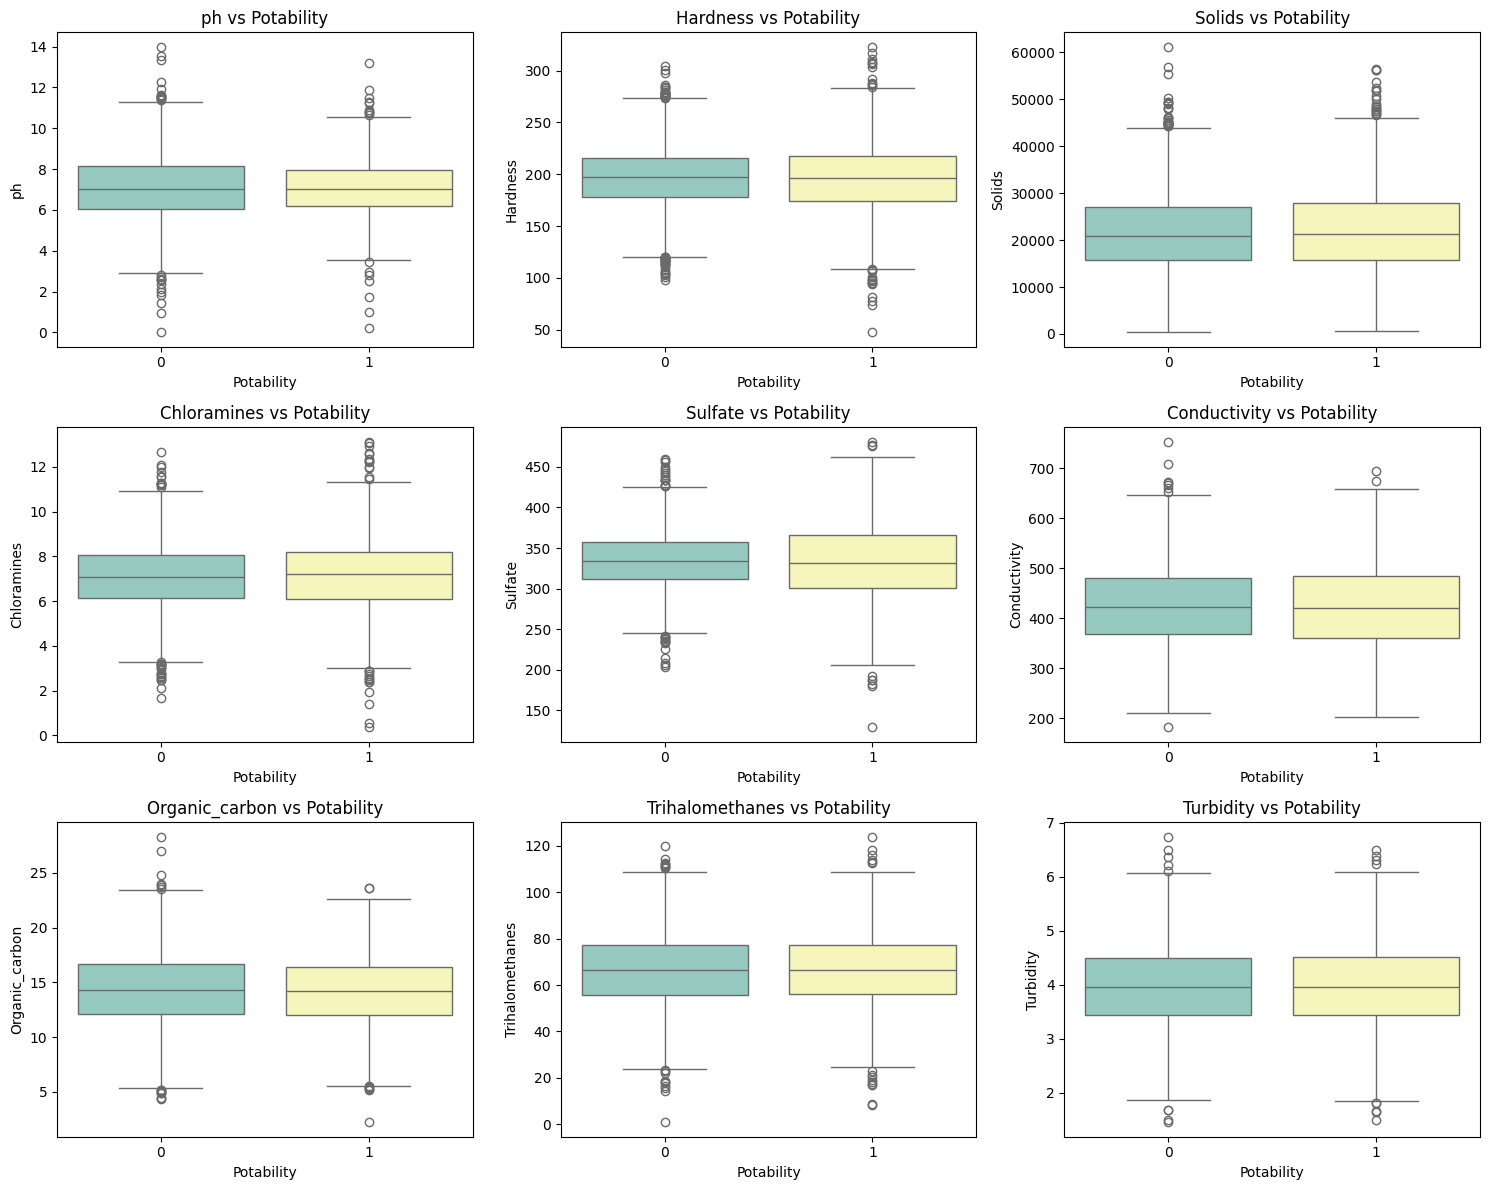

In [60]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Potability', y=col, data=data, palette='Set3')
    plt.title(f'{col} vs Potability')
    plt.xlabel('Potability')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Air dengan **`Conductivity`** terlalu tinggi cenderung tidak layak konsumsi.  Selain itu **`Organic Carbon`** yang terlalu tinggi juga membuat air cenderung tidak layak konsumsi.  

## 3. Data Preparation

Tahapan *data preparation* bertujuan untuk mempersiapkan data agar siap digunakan dalam pemodelan. Berikut adalah langkah-langkah *data preparation* yang diterapkan:

#### **1. Penanganan Missing Values**

Setelah menemukan missing values, langkah selanjutnya adalah mengisinya dengan nilai yang lebih representatif. Dalam hal ini, kita akan menggunakan **KNN Imputer**, yang mengisi nilai yang hilang dengan rata-rata nilai dari `k` tetangga terdekat berdasarkan fitur lainnya.


In [61]:
# Mengisi missing values menggunakan KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

# Verifikasi apakah masih ada missing values
missing_after_imputation = data.isnull().sum()
print("Missing Values setelah Imputasi:")
print(missing_after_imputation)

Missing Values setelah Imputasi:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Setelah imputasi, tidak ada lagi missing values dalam dataset, yang mempermudah analisis dan pemodelan selanjutnya.

#### **2. Penanganan Skewness pada Data**

Beberapa fitur dalam dataset, seperti `Solids` dan `Trihalomethanes`, memiliki distribusi yang skewed (terdistorsi). Skewness dapat memengaruhi kinerja model machine learning, terutama model yang sensitif terhadap distribusi data.

Transformasi untuk mengurangi skewness bertujuan untuk membuat distribusi data lebih normal. Ini membantu model machine learning untuk belajar lebih baik, karena model-model tersebut biasanya mengasumsikan distribusi normal atau mendekati normal untuk mendapatkan hasil terbaik.



In [62]:
# Transformasi log untuk mengurangi skewness pada fitur skewed
skewed_features = ['Solids', 'Trihalomethanes']
data[skewed_features] = data[skewed_features].apply(lambda x: np.log1p(x))

Setelah transformasi log, langkah selanjutnya adalah normalisasi fitur.


#### **3. Normalisasi Fitur**

Pada tahap ini, kita melakukan normalisasi data menggunakan **StandardScaler**. StandardScaler digunakan untuk memastikan bahwa setiap fitur memiliki skala yang seragam (mean = 0, std = 1), yang sangat membantu dalam algoritma berbasis jarak atau yang peka terhadap skala fitur, seperti KNN dan SVM.


In [63]:
# Memisahkan fitur dan target
X = data.drop(columns=['Potability'])
y = data['Potability']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,-1.849016e-16,1.024821e-15,-4.912635e-16,5.205441e-16,-1.565970e-15,1.708035e-16,2.385827e-17,-5.422335e-16,5.487403e-16
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-4.728360e+00,-4.530454e+00,-9.291136e+00,-4.277288e+00,-5.463113e+00,-3.028290e+00,-3.653635e+00,-1.347098e+01,-3.225560e+00
25%,-5.952700e-01,-5.937372e-01,-5.671896e-01,-6.285247e-01,-5.668349e-01,-7.482911e-01,-6.709187e-01,-4.775626e-01,-6.755095e-01
50%,-1.729109e-02,1.819424e-02,8.295979e-02,5.068209e-03,-9.038350e-03,-5.345935e-02,-2.014487e-02,1.300935e-01,-1.507005e-02
75%,5.814938e-01,6.174333e-01,6.825118e-01,6.271058e-01,5.715703e-01,6.878605e-01,6.870970e-01,6.536558e-01,6.837866e-01
max,4.624008e+00,3.855680e+00,2.493519e+00,3.793631e+00,3.936293e+00,4.048144e+00,4.237147e+00,2.413180e+00,3.552921e+00


Semua fitur sekarang memiliki rata-rata 0 dan standar deviasi 1, yang mengindikasikan bahwa data telah terstandardisasi dengan benar.


#### **4. Encoding Label**
Encoding diperlukan agar label `Potability` dapat diinterpretasikan oleh model dalam format numerik (jika diperlukan). Dalam kasus ini, label sudah dalam bentuk numerik (0 untuk "Tidak Layak Konsumsi", 1 untuk "Layak Konsumsi"), sehingga tidak diperlukan encoding tambahan.

#### **5. Menangani Ketidakseimbangan Data**

Dataset ini memiliki ketidakseimbangan kelas yang signifikan, dengan jumlah kelas `0` (air tidak layak) lebih banyak daripada kelas `1` (air layak). Ketidakseimbangan kelas dapat menyebabkan model cenderung memprediksi kelas mayoritas dan mengabaikan kelas minoritas. Oleh karena itu, kita akan menggunakan **SMOTE (Synthetic Minority Over-sampling Technique)** untuk meningkatkan jumlah sampel pada kelas minoritas.

SMOTE digunakan untuk mengatasi ketidakseimbangan kelas dengan cara membuat data sintetis untuk kelas minoritas. Teknik ini membantu model belajar lebih baik pada data yang seimbang dan meningkatkan kemampuannya dalam memprediksi kelas minoritas.




In [64]:
# Menangani ketidakseimbangan kelas menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y.value_counts())

# Setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(y_resampled.value_counts())

Distribusi kelas sebelum SMOTE:
Potability
0    1998
1    1278
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Potability
0    1998
1    1998
Name: count, dtype: int64


Setelah penerapan SMOTE, jumlah sampel untuk kelas `0` dan kelas `1` menjadi seimbang, yang akan membantu model untuk belajar dengan lebih baik tentang kedua kelas.

#### **6. Pembagian Data**
Langkah selanjutnya adalah membagi dataset menjadi data latih dan data uji. Ini adalah tahap yang sangat penting karena kita ingin menguji model kita pada data yang tidak digunakan saat pelatihan untuk menilai kinerja generalisasi.



In [65]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42, stratify=y_resampled)

# Verifikasi ukuran data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (3196, 9)
Ukuran X_test: (800, 9)
Ukuran y_train: (3196,)
Ukuran y_test: (800,)


Data telah berhasil dibagi menjadi 80% data latih dan 20% data uji. Ini adalah standar pembagian yang baik untuk memastikan model dapat diuji pada data yang tidak terlihat sebelumnya. Pembagian data latih dan uji memastikan bahwa model yang dibangun tidak terpengaruh oleh data yang sama yang digunakan dalam pelatihan, yang meningkatkan kredibilitas dan akurasi evaluasi model.


## 4. Modeling

Pada tahap ini, kita akan menguji tiga model klasifikasi yang berbeda untuk memprediksi apakah air layak dikonsumsi atau tidak (potability). Model yang akan digunakan adalah **Random Forest**, **XGBoost**, dan **Support Vector Machine (SVM)**. Setiap model akan dievaluasi berdasarkan kinerja akurasi dan beberapa metrik lainnya.


#### **1. Pemilihan Algoritma**

Untuk proyek ini, kita memilih tiga algoritma machine learning untuk menyelesaikan masalah klasifikasi: **Random Forest**, **XGBoost**, dan **Support Vector Machine (SVM)**.

- **Random Forest** adalah algoritma ensemble yang menggabungkan banyak pohon keputusan. Kelebihannya termasuk ketahanan terhadap overfitting, kemampuan menangani data yang besar dan kompleks, serta mampu mengatasi hubungan non-linear. Namun, kelemahannya adalah waktu pelatihan yang cukup lama jika jumlah pohon terlalu besar.
  
- **XGBoost** adalah algoritma boosting yang memfokuskan pada kesalahan yang dilakukan oleh model sebelumnya, menjadikannya sangat efisien dan sering memberikan hasil terbaik pada masalah tabular. Kelemahannya adalah cenderung rentan terhadap overfitting jika tidak dilakukan pengaturan hyperparameter yang tepat.
  
- **Support Vector Machine (SVM)** adalah algoritma yang membangun hyperplane terbaik untuk memisahkan kelas dengan margin terbesar. Kelebihannya adalah cocok untuk dataset dengan dimensi tinggi, namun model ini cenderung lambat pada dataset besar dan sangat sensitif terhadap pemilihan parameter.



#### **2. Random Forest**

Model **Random Forest** ditraining dengan menggunakan parameter defaultnya seperti `n_estimators=100`, `max_depth=None`, dan `min_samples_split=2`. Selain itu juga menggunakan `random_state=42` untuk memastikan evaluasi yang stabil.

In [66]:
# Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluasi Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       400
           1       0.73      0.70      0.71       400

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



Model ini menghasilkan **precision** sebesar 0.73 untuk kelas 1 dan **recall** 0.70, serta **F1-Score** 0.72, dengan akurasi keseluruhan 72%. Evaluasi ini menunjukkan bahwa model ini cukup baik dalam menangani kedua kelas, meskipun ada ruang untuk perbaikan, terutama pada recall untuk kelas 1.

#### **3. XGBoost**

Model **XGBoost** yang dipakai menggunakan parameter default. Selain itu juga digunakan parameter `eval_metric='logloss'` dan `random_state=42` untuk memastikan evaluasi yang stabil dan untuk mengoptimalkan loss function pada data.


In [67]:
# Model XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Evaluasi XGBoost
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       400
           1       0.67      0.70      0.69       400

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800



Hasil yang diperoleh menunjukkan **precision** yang sedikit lebih rendah (0.69 untuk kelas 0 dan 0.67 untuk kelas 1), dengan **recall** yang lebih baik pada kelas 1 (0.70). Meskipun akurasi keseluruhan model ini sedikit lebih rendah (0.68) dibandingkan dengan Random Forest, XGBoost menunjukkan kemampuan yang lebih baik dalam menangkap kelas 1, meskipun tidak seimbang dalam kelas 0.

#### **4. SVM**

Model **SVM** menggunakan kernel `rbf`, yang cocok untuk data non-linear.


In [68]:
# Model Support Vector Machine
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Evaluasi SVM
y_pred_svm = svm.predict(X_test)
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

SVM Performance:
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       400
           1       0.65      0.64      0.65       400

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800



SVM menunjukkan **precision** 0.65 dan **recall** 0.64 pada kelas 1, dengan **F1-Score** 0.65. Akurasi keseluruhan adalah 65%, yang lebih rendah dibandingkan kedua model lainnya. Ini menunjukkan bahwa SVM kurang efektif pada dataset ini, terutama dalam memisahkan kedua kelas dengan baik.

##### **Hasil Evaluasi Awal**:

Metrik evaluasi yang digunakan untuk menilai kinerja model adalah **precision**, **recall**, **F1-Score**, dan **accuracy**.

- **Precision** mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan seluruh prediksi positif. Ini sangat penting ketika kita ingin menghindari false positives, seperti prediksi salah bahwa air tidak layak konsumsi.
  
- **Recall** mengukur kemampuan model untuk menangkap seluruh data positif yang sebenarnya. Ini penting ketika kita ingin memastikan bahwa kita tidak melewatkan contoh "air yang tidak layak konsumsi" (false negatives).

- **F1-Score** memberikan keseimbangan antara precision dan recall, yang lebih sesuai digunakan ketika kita menghadapi dataset yang tidak seimbang.

- **Accuracy** memberikan gambaran umum tentang seberapa banyak prediksi yang benar, tetapi dapat menyesatkan pada dataset yang sangat tidak seimbang.

Evaluasi menunjukkan bahwa **Random Forest** memiliki performa yang lebih seimbang antara precision, recall, dan F1-Score, dengan akurasi 72%. **XGBoost** lebih baik dalam **recall** untuk kelas 1, namun akurasi keseluruhan lebih rendah (68%). **SVM** memiliki performa paling rendah dengan akurasi 65%, precision, recall, dan F1-Score yang lebih rendah di kedua kelas.


#### **5. Hyperparameter Tuning untuk Random Forest**

Untuk meningkatkan kinerja model, kita melakukan **Hyperparameter Tuning** menggunakan **GridSearchCV** untuk mencari kombinasi parameter terbaik yang meningkatkan performa Random Forest. Model terbaik yang dipilih adalah **Random Forest**, karena keseimbangan antara **precision**, **recall**, dan **F1-Score** yang lebih baik pada hasil evaluasi sebelumnya.


In [69]:
# Hyperparameter Tuning untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=3,
                       scoring='accuracy',
                       verbose=1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [70]:
# Melihat Best Hyperparameters
print("Best Hyperparameters:")
print(grid_rf.best_params_)  # Menampilkan parameter terbaik yang ditemukan

# Evaluasi Random Forest setelah tuning
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Best Hyperparameters:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Performance:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       400
           1       0.73      0.72      0.72       400

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



Setelah tuning, parameter terbaik yang ditemukan adalah `max_depth=20`, `min_samples_split=2`, dan `n_estimators=300`. Performa model Random Forest sedikit meningkat. **Precision** untuk kelas 1 (air tidak layak konsumsi) mencapai 0.73, menunjukkan model cukup tepat dalam memprediksi air yang tidak layak konsumsi tanpa banyak menghasilkan kesalahan prediksi.

Di sisi lain, **recall** untuk kelas 1 adalah 0.72, yang berarti model berhasil menangkap sebagian besar kasus air yang tidak layak konsumsi meskipun masih ada beberapa kesalahan. **F1-Score** yang seimbang (0.73 untuk kedua kelas) menunjukkan bahwa model mampu menjaga keseimbangan antara precision dan recall, menghasilkan performa yang cukup baik pada kedua kelas. **Akurasi** keseluruhan mencapai 0.73, menunjukkan bahwa model berhasil mengklasifikasikan lebih dari 70% data dengan benar, memberikan hasil yang cukup baik untuk klasifikasi biner ini.

##### **Confusion Matrix dan Feature Importance untuk Random Forest**

Untuk menganalisis kinerja model lebih lanjut, kita juga bisa melihat **confusion matrix** dan **feature importance** dari Random Forest setelah tuning.

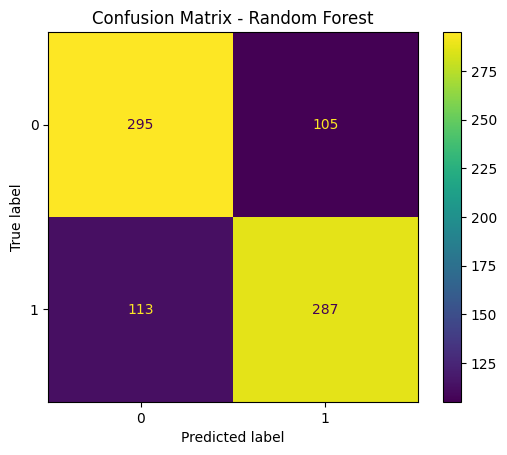

In [71]:
# Confusion Matrix untuk Model Terbaik
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

Dari visualisasi confusion matrix terlihat model memiliki **True positives (287)** yang menunjukkan bahwa model mampu mengidentifikasi air yang tidak layak konsumsi dengan baik, sedangkan **false positives (105)** dan **false negatives (113)** menunjukkan ada ruang untuk perbaikan, khususnya dalam mengurangi prediksi yang salah, baik dalam menganggap air yang layak konsumsi sebagai tidak layak atau sebaliknya.

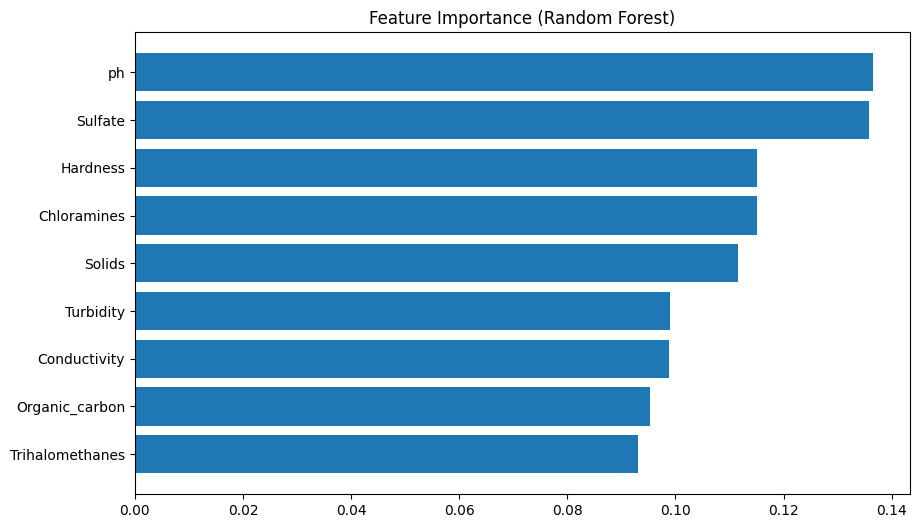

In [72]:
# Feature importance untuk Random Forest
importances = best_rf.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [X_train.columns[i] for i in sorted_indices])
plt.title('Feature Importance (Random Forest)')
plt.show()

Visualisasi feature importance menunjukkan bahwa fitur-fitur seperti **pH**, **sulfate**, dan **hardness** memainkan peran penting dalam keputusan model. **pH** adalah faktor paling dominan, yang mengindikasikan bahwa keseimbangan asam-basa air sangat mempengaruhi kualitasnya. **Sulfate**, yang berhubungan dengan kandungan mineral dalam air, juga sangat berpengaruh terhadap keputusan model, yang menunjukkan bahwa kadar sulfat yang tinggi dapat menjadi indikator kualitas air yang buruk. **Hardness** menunjukkan bahwa kandungan mineral keras dalam air berperan dalam menentukan apakah air layak konsumsi atau tidak.

Kesimpulan:

Secara keseluruhan, model Random Forest setelah dilakukan hyperparameter tuning memberikan hasil yang cukup baik dan seimbang dalam memprediksi kualitas air. Metrik evaluasi yang baik, confusion matrix yang relatif baik, serta feature importance yang jelas dan sesuai dengan pengetahuan domain, menunjukkan bahwa model ini adalah solusi yang sangat efektif dalam menyelesaikan masalah klasifikasi kualitas air. Model ini tidak hanya dapat memprediksi dengan akurasi yang cukup tinggi, tetapi juga memberikan insight yang berguna mengenai faktor-faktor yang paling memengaruhi kualitas air.